https://www.tensorflow.org/tutorials/keras/classification#build_the_model          
https://www.tensorflow.org/tutorials/structured_data/feature_columns#choose_which_columns_to_use                 
https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d          
https://www.tensorflow.org/tutorials/keras/regression          
https://towardsdatascience.com/how-to-use-dataset-in-tensorflow-c758ef9e4428              

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from const import GENERATED_DIR, PICKLE_GENERATED_DATASET
from pathlib import Path
from sklearn.metrics import confusion_matrix


import pickle as pkl
import tensorflow as tf
import pandas as pd
import arff
import numpy as np
import seaborn as sns

from tensorflow import feature_column
import matplotlib.pyplot as plt

In [2]:
def read_data(path):
    dataset = arff.load(open(path, "r"))
    attributes = [a for a, b in dataset["attributes"]]
    data = np.array(dataset["data"])

    df = pd.DataFrame(data, columns=attributes, dtype=np.float64)

    df["unim_entr"] = df["unim_entr"].astype(np.uint8)
    df["physionet"] = pd.Categorical(df["physionet"])
    df["physionet"] = df.physionet.cat.codes
    return df


def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('physionet')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds


def get_compiled_model(feature_layer):
    model = tf.keras.Sequential([
      feature_layer,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [3]:
folder_path = Path.joinpath(GENERATED_DIR, "explicit_entropy", "00735")
train_path = Path.joinpath(folder_path, "train.arff")
test_path = Path.joinpath(folder_path, "test.arff")

# Read data and transorm in feature columns
# https://www.tensorflow.org/tutorials/structured_data/feature_columns#demonstrate_several_types_of_feature_column
train_df = read_data(train_path)
test_df = read_data(test_path)

train_ds = df_to_dataset(train_df, shuffle=False)
test_ds = df_to_dataset(test_df, shuffle=False)

for feature_batch, label_batch in train_ds.take(1):
    print('Every feature:', list(feature_batch.keys()))
    print('A batch of unim_entr:', feature_batch['unim_entr'])
    print('A batch of targets:', label_batch)

feature_columns = []
for header in ['zhou_entr', 'unim_entr']:
    feature_columns.append(feature_column.numeric_column(header))

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
model = get_compiled_model(feature_layer)


# Fitting the model 
hist = model.fit(train_ds, epochs=1000)

Every feature: ['zhou_entr', 'unim_entr']
A batch of unim_entr: tf.Tensor(
[ 9  9  9  9  9  9  9  9  9  9  9  9  9  8  7  7  7  7  7  7  8  8  8  9
 10  9  9  9  9  9  9  9], shape=(32,), dtype=int32)
A batch of targets: tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int32)

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/1000
36960/36960 [==============================] - 244s 7ms/step - loss: 0.0876 - accuracy: 0.9723
Epoch 2/1000
36960/36960 [==============================] - 116s 3ms/step - 

36960/36960 [==============================] - 101s 3ms/step - loss: 0.0625 - accuracy: 0.9810
Epoch 67/1000
36960/36960 [==============================] - 101s 3ms/step - loss: 0.0616 - accuracy: 0.9807
Epoch 68/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0603 - accuracy: 0.9810
Epoch 69/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0623 - accuracy: 0.9810
Epoch 70/1000
36960/36960 [==============================] - 101s 3ms/step - loss: 0.0610 - accuracy: 0.9804
Epoch 71/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0613 - accuracy: 0.9808
Epoch 72/1000
36960/36960 [==============================] - 101s 3ms/step - loss: 0.0594 - accuracy: 0.9810
Epoch 73/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0593 - accuracy: 0.9811
Epoch 74/1000
36960/36960 [==============================] - 101s 3ms/step - loss: 0.0603 - accuracy: 0.9810
Epoch 75/1000
36960/36960 [======

36960/36960 [==============================] - 101s 3ms/step - loss: 0.0621 - accuracy: 0.9800
Epoch 141/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0609 - accuracy: 0.9803
Epoch 142/1000
36960/36960 [==============================] - 101s 3ms/step - loss: 0.0614 - accuracy: 0.9802
Epoch 143/1000
36960/36960 [==============================] - 101s 3ms/step - loss: 0.0627 - accuracy: 0.9798
Epoch 144/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0617 - accuracy: 0.9802
Epoch 145/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0623 - accuracy: 0.9799
Epoch 146/1000
36960/36960 [==============================] - 101s 3ms/step - loss: 0.0620 - accuracy: 0.9801
Epoch 147/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0640 - accuracy: 0.9798
Epoch 148/1000
36960/36960 [==============================] - 101s 3ms/step - loss: 0.0623 - accuracy: 0.9802
Epoch 149/1000
36960/3696

36960/36960 [==============================] - 102s 3ms/step - loss: 0.0781 - accuracy: 0.9760
Epoch 215/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0802 - accuracy: 0.9756
Epoch 216/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0747 - accuracy: 0.9762
Epoch 217/1000
36960/36960 [==============================] - 101s 3ms/step - loss: 0.0733 - accuracy: 0.9765
Epoch 218/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0717 - accuracy: 0.9768
Epoch 219/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0729 - accuracy: 0.9764
Epoch 220/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0751 - accuracy: 0.9762
Epoch 221/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0722 - accuracy: 0.9766
Epoch 222/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0736 - accuracy: 0.9764
Epoch 223/1000
36960/3696

36960/36960 [==============================] - 102s 3ms/step - loss: 0.0679 - accuracy: 0.9782
Epoch 289/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0683 - accuracy: 0.9783
Epoch 290/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0671 - accuracy: 0.9784
Epoch 291/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0679 - accuracy: 0.9782
Epoch 292/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0667 - accuracy: 0.9784
Epoch 293/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0686 - accuracy: 0.9784
Epoch 294/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0676 - accuracy: 0.9783
Epoch 295/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0674 - accuracy: 0.9782
Epoch 296/1000
36960/36960 [==============================] - 101s 3ms/step - loss: 0.0678 - accuracy: 0.9782
Epoch 297/1000
36960/3696

36960/36960 [==============================] - 102s 3ms/step - loss: 0.0621 - accuracy: 0.9807
Epoch 363/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0621 - accuracy: 0.9806
Epoch 364/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0625 - accuracy: 0.9807
Epoch 365/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0629 - accuracy: 0.9806
Epoch 366/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0625 - accuracy: 0.9804
Epoch 367/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0624 - accuracy: 0.9803
Epoch 368/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0626 - accuracy: 0.9805
Epoch 369/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0626 - accuracy: 0.9806
Epoch 370/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0619 - accuracy: 0.9806
Epoch 371/1000
36960/3696

36960/36960 [==============================] - 140s 4ms/step - loss: 0.0734 - accuracy: 0.9764
Epoch 437/1000
36960/36960 [==============================] - 153s 4ms/step - loss: 0.0733 - accuracy: 0.9765
Epoch 438/1000
36960/36960 [==============================] - 122s 3ms/step - loss: 0.0771 - accuracy: 0.9763
Epoch 439/1000
36960/36960 [==============================] - 132s 4ms/step - loss: 0.0736 - accuracy: 0.9765
Epoch 440/1000
36960/36960 [==============================] - 112s 3ms/step - loss: 0.0750 - accuracy: 0.9764
Epoch 441/1000
36960/36960 [==============================] - 112s 3ms/step - loss: 0.0747 - accuracy: 0.9765
Epoch 442/1000
36960/36960 [==============================] - 112s 3ms/step - loss: 0.0737 - accuracy: 0.9764
Epoch 443/1000
36960/36960 [==============================] - 120s 3ms/step - loss: 0.0752 - accuracy: 0.9763
Epoch 444/1000
36960/36960 [==============================] - 126s 3ms/step - loss: 0.0763 - accuracy: 0.9763
Epoch 445/1000
36960/3696

36960/36960 [==============================] - 174s 5ms/step - loss: 0.0693 - accuracy: 0.9779
Epoch 511/1000
36960/36960 [==============================] - 178s 5ms/step - loss: 0.0698 - accuracy: 0.9779
Epoch 512/1000
36960/36960 [==============================] - 163s 4ms/step - loss: 0.0697 - accuracy: 0.9778
Epoch 513/1000
36960/36960 [==============================] - 161s 4ms/step - loss: 0.0698 - accuracy: 0.9779
Epoch 514/1000
36960/36960 [==============================] - 119s 3ms/step - loss: 0.0698 - accuracy: 0.9777
Epoch 515/1000
36960/36960 [==============================] - 117s 3ms/step - loss: 0.0696 - accuracy: 0.9778
Epoch 516/1000
36960/36960 [==============================] - 118s 3ms/step - loss: 0.0696 - accuracy: 0.9778
Epoch 517/1000
36960/36960 [==============================] - 119s 3ms/step - loss: 0.0696 - accuracy: 0.9778
Epoch 518/1000
36960/36960 [==============================] - 119s 3ms/step - loss: 0.0694 - accuracy: 0.9779
Epoch 519/1000
36960/3696

36960/36960 [==============================] - 151s 4ms/step - loss: 0.0692 - accuracy: 0.9779
Epoch 585/1000
36960/36960 [==============================] - 151s 4ms/step - loss: 0.0693 - accuracy: 0.9779
Epoch 586/1000
36960/36960 [==============================] - 152s 4ms/step - loss: 0.0691 - accuracy: 0.9780
Epoch 587/1000
36960/36960 [==============================] - 151s 4ms/step - loss: 0.0694 - accuracy: 0.9779
Epoch 588/1000
36960/36960 [==============================] - 150s 4ms/step - loss: 0.0695 - accuracy: 0.9780
Epoch 589/1000
36960/36960 [==============================] - 152s 4ms/step - loss: 0.0706 - accuracy: 0.9778
Epoch 590/1000
36960/36960 [==============================] - 149s 4ms/step - loss: 0.0695 - accuracy: 0.9780
Epoch 591/1000
36960/36960 [==============================] - 119s 3ms/step - loss: 0.0709 - accuracy: 0.9775
Epoch 592/1000
36960/36960 [==============================] - 126s 3ms/step - loss: 0.0697 - accuracy: 0.9778
Epoch 593/1000
36960/3696

36960/36960 [==============================] - 102s 3ms/step - loss: 0.0703 - accuracy: 0.9776
Epoch 659/1000
36960/36960 [==============================] - 132s 4ms/step - loss: 0.0692 - accuracy: 0.9779
Epoch 660/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0692 - accuracy: 0.9779
Epoch 661/1000
36960/36960 [==============================] - 111s 3ms/step - loss: 0.0696 - accuracy: 0.9777
Epoch 662/1000
36960/36960 [==============================] - 131s 4ms/step - loss: 0.0727 - accuracy: 0.9777
Epoch 663/1000
36960/36960 [==============================] - 131s 4ms/step - loss: 0.0693 - accuracy: 0.9779
Epoch 664/1000
36960/36960 [==============================] - 133s 4ms/step - loss: 0.0712 - accuracy: 0.9775
Epoch 665/1000
36960/36960 [==============================] - 145s 4ms/step - loss: 0.0698 - accuracy: 0.9777
Epoch 666/1000
36960/36960 [==============================] - 141s 4ms/step - loss: 0.0702 - accuracy: 0.9776
Epoch 667/1000
36960/3696

36960/36960 [==============================] - 101s 3ms/step - loss: 0.0697 - accuracy: 0.9776
Epoch 733/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0698 - accuracy: 0.9776
Epoch 734/1000
36960/36960 [==============================] - 101s 3ms/step - loss: 0.0714 - accuracy: 0.9778
Epoch 735/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0684 - accuracy: 0.9779
Epoch 736/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0674 - accuracy: 0.9782
Epoch 737/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0679 - accuracy: 0.9779
Epoch 738/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0681 - accuracy: 0.9779
Epoch 739/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0684 - accuracy: 0.9779
Epoch 740/1000
36960/36960 [==============================] - 101s 3ms/step - loss: 0.0688 - accuracy: 0.9779
Epoch 741/1000
36960/3696

36960/36960 [==============================] - 102s 3ms/step - loss: 0.0702 - accuracy: 0.9777
Epoch 807/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0692 - accuracy: 0.9775
Epoch 808/1000
36960/36960 [==============================] - 101s 3ms/step - loss: 0.0704 - accuracy: 0.9775
Epoch 809/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0707 - accuracy: 0.9776
Epoch 810/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0690 - accuracy: 0.9776
Epoch 811/1000
36960/36960 [==============================] - 101s 3ms/step - loss: 0.0698 - accuracy: 0.9777
Epoch 812/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0684 - accuracy: 0.9778
Epoch 813/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0692 - accuracy: 0.9777
Epoch 814/1000
36960/36960 [==============================] - 101s 3ms/step - loss: 0.0710 - accuracy: 0.9774
Epoch 815/1000
36960/3696

36960/36960 [==============================] - 102s 3ms/step - loss: 0.0764 - accuracy: 0.9754
Epoch 881/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0764 - accuracy: 0.9754
Epoch 882/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0764 - accuracy: 0.9754
Epoch 883/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0764 - accuracy: 0.9754
Epoch 884/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0764 - accuracy: 0.9754
Epoch 885/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0764 - accuracy: 0.9754
Epoch 886/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0764 - accuracy: 0.9754
Epoch 887/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0764 - accuracy: 0.9754
Epoch 888/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0764 - accuracy: 0.9754
Epoch 889/1000
36960/3696

36960/36960 [==============================] - 102s 3ms/step - loss: 0.0764 - accuracy: 0.9755
Epoch 955/1000
36960/36960 [==============================] - 101s 3ms/step - loss: 0.0764 - accuracy: 0.9755
Epoch 956/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0764 - accuracy: 0.9755
Epoch 957/1000
36960/36960 [==============================] - 101s 3ms/step - loss: 0.0764 - accuracy: 0.9755
Epoch 958/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0765 - accuracy: 0.9755
Epoch 959/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0765 - accuracy: 0.9755
Epoch 960/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0765 - accuracy: 0.9755
Epoch 961/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0765 - accuracy: 0.9755
Epoch 962/1000
36960/36960 [==============================] - 102s 3ms/step - loss: 0.0765 - accuracy: 0.9755
Epoch 963/1000
36960/3696

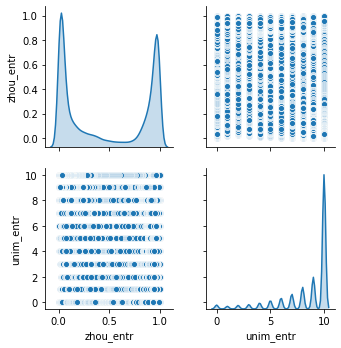

In [4]:
sns.pairplot(train_df[["zhou_entr", "unim_entr"]], diag_kind="kde")

In [5]:
prediction = model.predict(test_ds)

prediction1 = [1 if p > 0.5 else 0 for p in prediction]
prediction2 = (prediction > 0.5)

In [6]:
cm = confusion_matrix(test_df["physionet"], prediction2)
cm

array([[39852,    39],
       [   77,   255]])

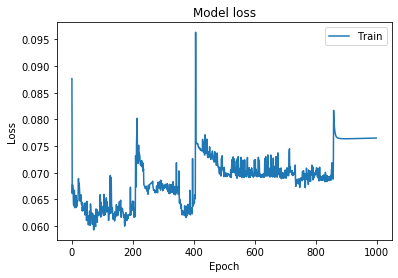

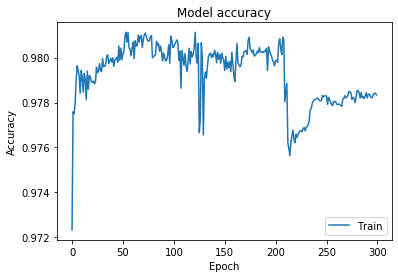

In [10]:
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'][0:300])
#plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()